In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import nibabel as nib 
from matplotlib.patches import Patch

In [2]:
def interactive_plot_image(img):
    """
    Create an interactive plot for a 3D image with the choice of using sliders or text boxes for input.
    Args:
    img (numpy.ndarray): The 3D image array.
    """
    
    def plot_image(x, y, z):
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        slices = [img[int(x), :, :], img[:, int(y), :], img[:, :, int(z)]]
        
        for i, slice in enumerate(slices):
            axes[i].imshow(slice.T, cmap="gray", origin="lower")
            axes[i].axis("off")
        
        plt.show()

    
    x_input = widgets.IntSlider(min=0, max=img.shape[0]-1, step=1, value=img.shape[0]//2, description='X Slice:')
    y_input = widgets.IntSlider(min=0, max=img.shape[1]-1, step=1, value=img.shape[1]//2, description='Y Slice:')
    z_input = widgets.IntSlider(min=0, max=img.shape[2]-1, step=1, value=img.shape[2]//2, description='Z Slice:')


    # Bind the inputs to the plot_image function
    ui = widgets.VBox([x_input, y_input, z_input])
    out = widgets.interactive_output(plot_image, {'x': x_input, 'y': y_input, 'z': z_input})
    
    display(ui, out)


In [3]:
image = nib.load('/data/neuromark2/Data/ABCD/Data_BIDS_5/Raw_Data/NDARINVR01XKDF7/Baseline/anat_20180526114202/smwc1pT1.nii').get_fdata()

In [4]:
interactive_plot_image(image)

Output()

In [5]:
frontal = nib.load('/data/users3/jchen/atlas/Jean_abcd/abcd_mask/final/roiFrontal_forSmri.nii').get_fdata()

In [6]:
interactive_plot_image(frontal)

Output()

In [22]:
def plot_region_index_histogram(df):
    """
    Plots a histogram using the 'region index' and 'region index count' columns from the DataFrame.
    
    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data.
    - region_index_col (str): The name of the 'region index' column.
    - region_index_count_col (str): The name of the 'region index count' column.
    """
    plt.figure(figsize=(20, 8))
    colors = {'frontal': 'blue', 'thalamus': 'green', 'cereb': 'pink', 'RN':'red', 'parietal':'black'}
    plt.bar(df['Region Unique Number'], df['Number of Voxels'], color=[colors[region] for region in df['Region Name']])
    plt.xlabel('Region Unique Number')
    plt.ylabel('Region Index Count')
    plt.title('Histogram of Region Index Count')
    # Set y-ticks
    max_count = df['Number of Voxels'].max()
    plt.yticks(np.linspace(0, 3300, 30))
    legend_handles = [Patch(color='blue', label='frontal'), Patch(color='pink', label='cereb'), Patch(color='red', label='RN'), Patch(color='green', label='thalamus'), Patch(color = 'black', label = 'parietal')]

# Add the legend to the plot
    plt.legend(handles=legend_handles, title='Regions')
  #  plt.grid(True)
    plt.show()


In [23]:
result_df = pd.read_csv('3D_Masks_Data_parietal.csv')

In [24]:
result_df.head()

,Region Name,Region Unique Number,Number of Voxels,Mask File Path,Delta X,Delta Y,Delta Z,Mask Center,Mni_Scaled
0,frontal,32,51,/data/users4/sdeshpande8/3D_Mask_Brain_CNN/3D_...,14,18,10,"[93, 79, 49, 1]","[-0.66, -0.068, 0.018]"
1,frontal,33,22,/data/users4/sdeshpande8/3D_Mask_Brain_CNN/3D_...,10,7,4,"[97, 75, 54, 1]","[-0.74, -0.123, 0.106]"
2,frontal,34,105,/data/users4/sdeshpande8/3D_Mask_Brain_CNN/3D_...,8,5,10,"[85, 70, 54, 1]","[-0.5, -0.191, 0.106]"
3,frontal,35,492,/data/users4/sdeshpande8/3D_Mask_Brain_CNN/3D_...,7,14,12,"[87, 78, 55, 1]","[-0.54, -0.082, 0.124]"
4,frontal,36,83,/data/users4/sdeshpande8/3D_Mask_Brain_CNN/3D_...,8,6,4,"[85, 70, 59, 1]","[-0.5, -0.191, 0.194]"


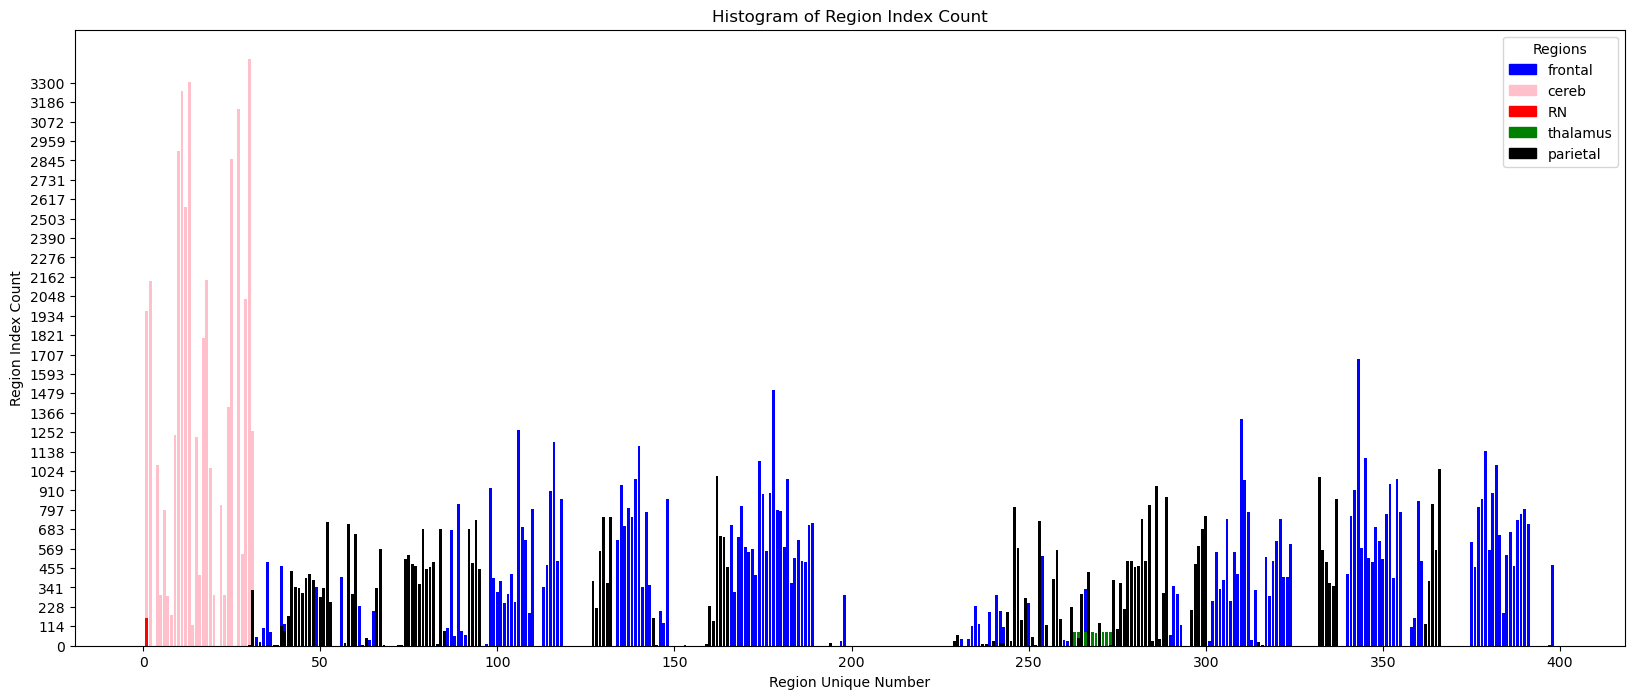

In [25]:
plot_region_index_histogram(result_df)

In [26]:

region_counts_cerebellum = result_df[result_df['Region Name']=='cereb']
region_counts_frontal = result_df[result_df['Region Name']=='frontal']
region_counts_RN = result_df[result_df['Region Name']=='RN']
region_counts_thalamus = result_df[result_df['Region Name']=='thalamus']

In [32]:
region_counts_frontal[region_counts_frontal['list_size']<25].shape

(8, 4)

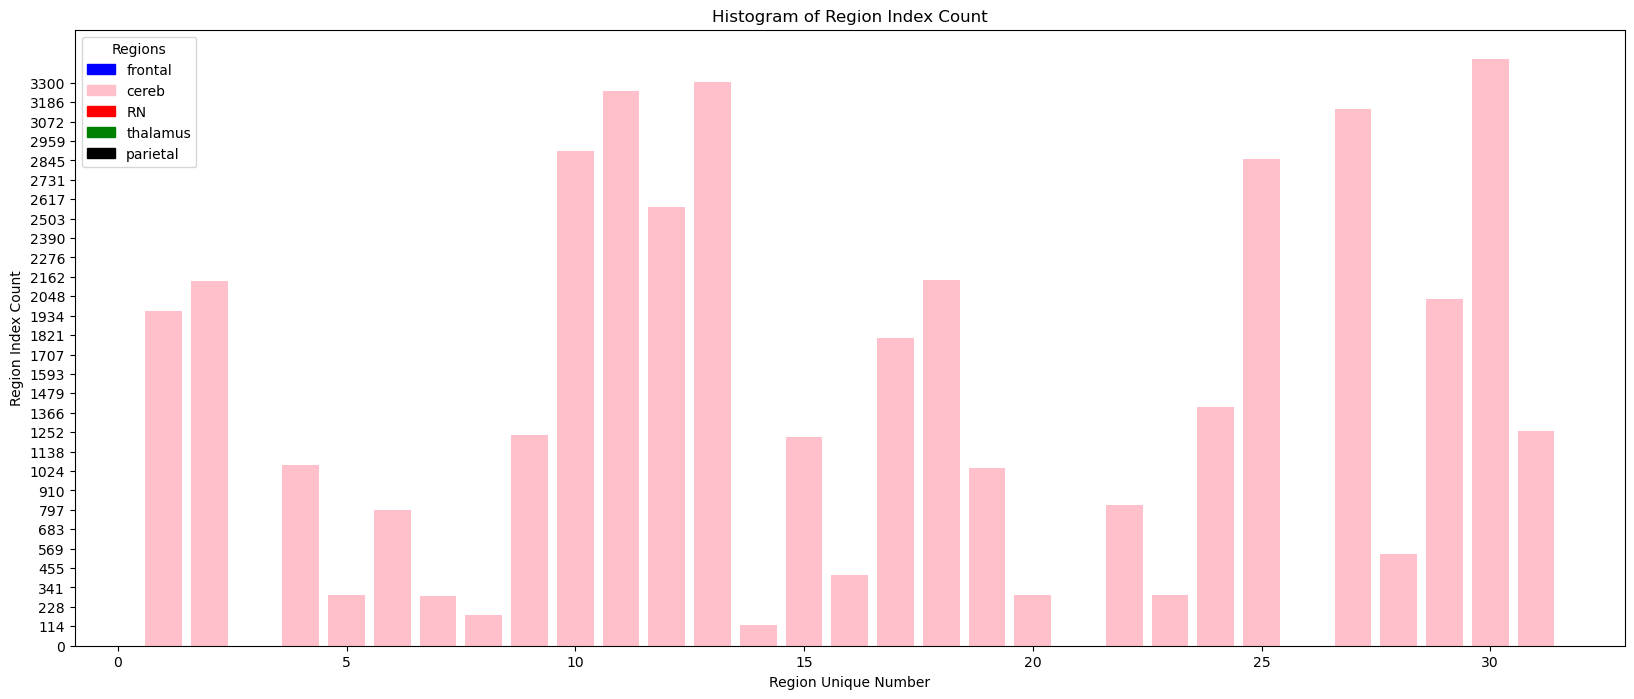

In [27]:
plot_region_index_histogram(region_counts_cerebellum)

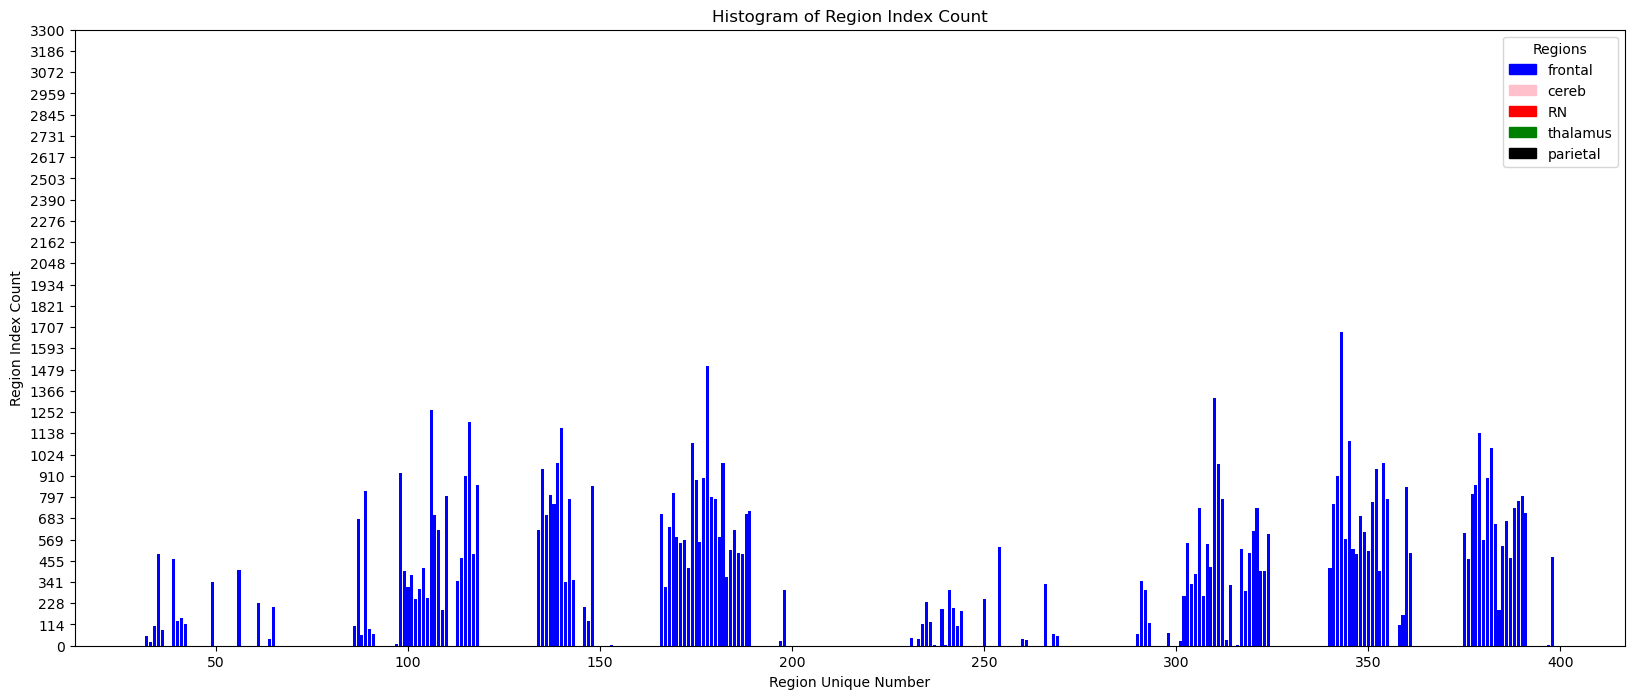

In [28]:
plot_region_index_histogram(region_counts_frontal)

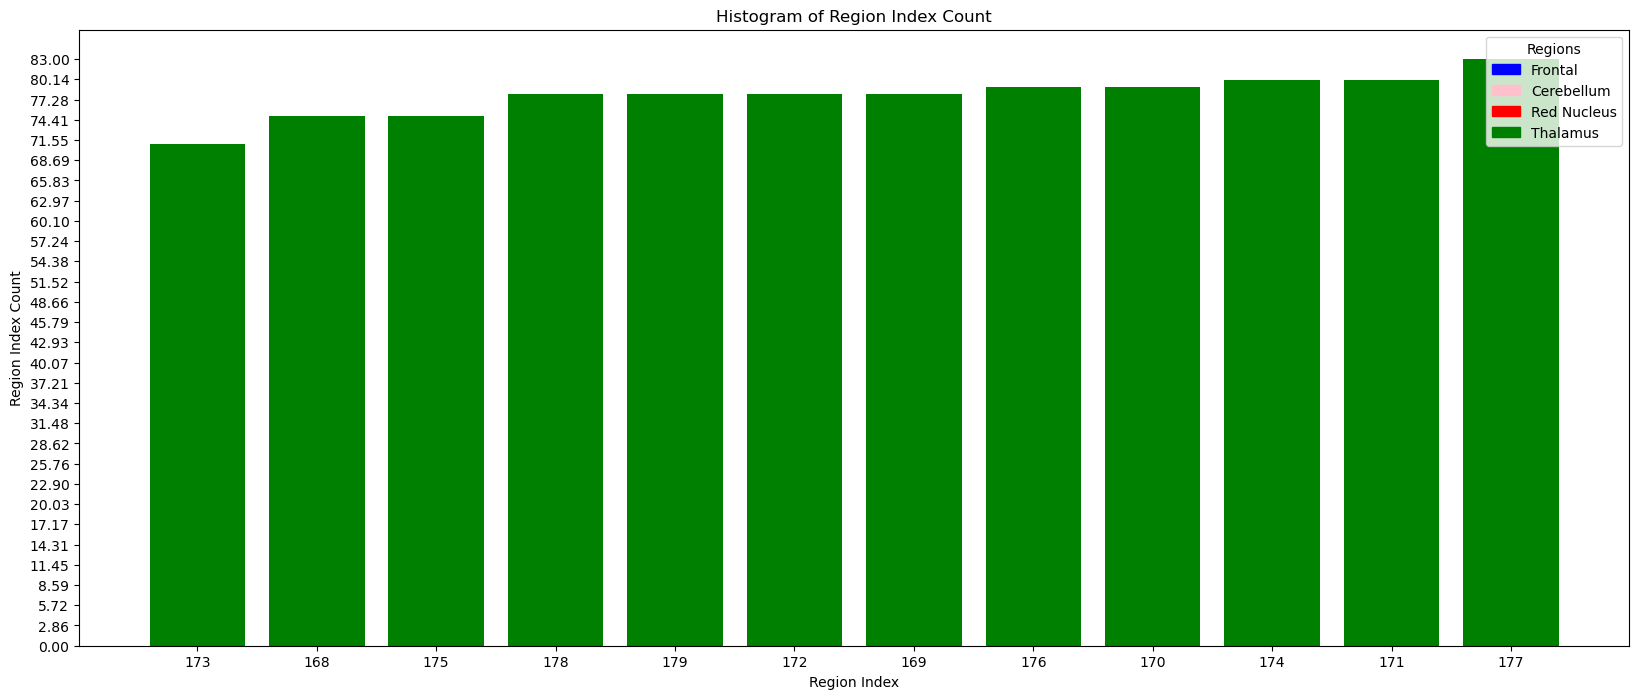

In [19]:
plot_region_index_histogram(region_counts_thalamus)

In [48]:
result_df[result_df['list_size']< 70].shape

(23, 4)

In [38]:
region_counts_RN

,Region,Region_Index,counts
198,RN,211,165


In [40]:
region_counts_thalamus

,Region,Region_Index,counts
199,Thalamus,168,75
200,Thalamus,169,78
201,Thalamus,170,79
202,Thalamus,171,80
203,Thalamus,172,78
204,Thalamus,173,71
205,Thalamus,174,80
206,Thalamus,175,75
207,Thalamus,176,79
208,Thalamus,177,83


In [7]:
import os
import torch

# Define the subject directory (update with the correct subject ID)
subject_dir = "/data/users4/sdeshpande8/Dense_Brain_Aware_VIT/precomputed_tensors/subject_NDAR_INV6NYCB4Y6"

# Load tensors
cnn1_data = torch.load(os.path.join(subject_dir, "cnn1.pt"))
cnn2_data = torch.load(os.path.join(subject_dir, "cnn2.pt"))
encodings1 = torch.load(os.path.join(subject_dir, "cnn1_encodings.pt"))
encodings2 = torch.load(os.path.join(subject_dir, "cnn2_encodings.pt"))
working_memory = torch.load(os.path.join(subject_dir, "working_memory.pt"))

# Print shapes and basic information
print(f"cnn1_data shape: {cnn1_data.shape}")
print(f"cnn2_data shape: {cnn2_data.shape}")
print(f"encodings1 shape: {encodings1.shape}")
print(f"encodings2 shape: {encodings2.shape}")
print(f"working_memory shape: {working_memory.shape}")

cnn1_data shape: torch.Size([305, 25, 25, 25])
cnn2_data shape: torch.Size([27, 41, 41, 41])
encodings1 shape: torch.Size([305, 3])
encodings2 shape: torch.Size([27, 3])
working_memory shape: torch.Size([1])


/tmp/ipykernel_1569690/3734369391.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cnn1_data = torch.load(os.path.join(subject_dir, "cnn1.pt"))
/tmp/ipykernel_1569690/373

In [8]:
encodings1

tensor([[ 0.3400,  0.5320,  0.0530],
        [-0.0800,  0.4640,  0.3710],
        [ 0.4200,  0.4230,  0.3530],
        [-0.4200,  0.3950,  0.3880],
        [-0.1800,  0.4360, -0.2290],
        [-0.6000,  0.1770,  0.3530],
        [ 0.0600,  0.3680, -0.1240],
        [ 0.5600,  0.4360,  0.1940],
        [-0.1000,  0.3950,  0.0880],
        [ 0.0800,  0.5050,  0.1760],
        [ 0.6400, -0.5860,  0.4940],
        [-0.6400, -0.5590,  0.3880],
        [ 0.7200, -0.4770,  0.5470],
        [ 0.4800,  0.1500,  0.6530],
        [-0.5400,  0.1770,  0.5820],
        [-0.5800,  0.3550,  0.2650],
        [ 0.0800,  0.1640,  0.4410],
        [ 0.5800,  0.1910,  0.5120],
        [-0.6000,  0.4500, -0.0530],
        [ 0.3800, -0.5320,  0.6880],
        [-0.5200,  0.0270, -0.0530],
        [ 0.5600,  0.4640, -0.0710],
        [-0.3200,  0.2050, -0.2120],
        [ 0.0800,  0.3820,  0.0880],
        [-0.0800,  0.2860,  0.2650],
        [-0.7000,  0.2050,  0.1410],
        [ 0.3600, -0.4500,  0.7940],
 

In [9]:
encodings2

tensor([[-0.3800, -0.6270, -0.5120],
        [ 0.3600, -0.6270, -0.5120],
        [ 0.3600, -0.5180, -0.3880],
        [-0.3800, -0.5320, -0.4060],
        [ 0.3600, -0.5590, -0.4240],
        [-0.3800, -0.5450, -0.4240],
        [ 0.3200, -0.5730, -0.4940],
        [-0.3000, -0.4910, -0.3880],
        [ 0.3000, -0.4910, -0.3880],
        [-0.3600, -0.5860, -0.4940],
        [ 0.2600, -0.5180, -0.3710],
        [-0.2800, -0.5180, -0.3710],
        [-0.3200, -0.5450, -0.4590],
        [-0.3800, -0.6140, -0.5290],
        [ 0.3000, -0.5450, -0.4240],
        [ 0.3600, -0.6140, -0.5290],
        [ 0.2400, -0.4770, -0.4590],
        [-0.2200, -0.4770, -0.4590],
        [-0.2800, -0.4910, -0.4410],
        [ 0.2400, -0.4770, -0.4410],
        [-0.4000, -0.5590, -0.4410],
        [-0.1800, -0.5450, -0.3710],
        [-0.3000, -0.5180, -0.4940],
        [-0.2600, -0.5050, -0.6000],
        [ 0.2600, -0.5180, -0.4940],
        [ 0.2600, -0.5050, -0.6000],
        [ 0.3400, -0.6410, -0.5470]], 